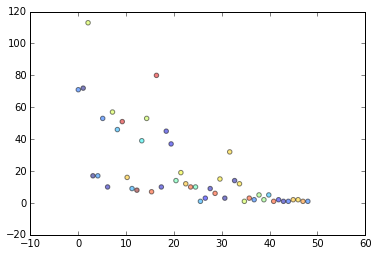

In [32]:
# DP sampling with Polya Urn

import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

alpha = 10 # DP Parameter
num_ball = 1000 # Number of conduct : Draw a ball from a polya urn
base_distribution = 'normal'
if base_distribution == 'normal':
    mu = 0
    sigma = 1
    ball_color = np.random.normal(0,1,num_ball)
ball_dict = dict() # allocated color for each ball
urn = [] # number of ball for each color in urn
prob_color = [] # probability of drawing a color
unique_color = [] # unique color among already drawn balls
for itr in range(num_ball):
    if itr == 0:
        ball_dict[itr] = ball_color[itr] # matching between ball color and normal generated ball value
        urn.append(1) # Put a 0-th ball into urn
        unique_color.append(ball_color[itr])
        continue
    prob_color = urn[:]
    prob_color.append(alpha)
    random_number = np.random.uniform(0,1)
    lottery = sum([1 for itr in range(len(np.cumsum(prob_color))) if  random_number*sum(prob_color) > np.cumsum(prob_color)[itr]])
    if lottery > len(unique_color)-1: #len(urn) : number of unique color / Draw a color from base distribution H
        ball_dict[itr] = ball_color[itr]
        if ball_color[itr] in unique_color: # Draw color from base distribution H, but if the color in urn already.....
            # Because we draw ball from base distribution, Normal(Continuous) , this loop condition will be very rarely satisfied 
            urn[unique_color.index(ball_color[itr])] = urn[unique_color.index(ball_color[itr])] + 1
        else: # Draw color from base distribution H, and if the color is not in urn.....
            urn.append(1)
            unique_color.append(ball_color[itr])
    else:
        ball_dict[itr] = unique_color[lottery]
        urn[lottery] = urn[lottery] + 1

# Plotting , x-axis : i-th unique color / y-axis : number of balls which has i-th unique color 
N = len(unique_color)
colors = np.random.rand(N)
plt.scatter(np.linspace(0,N,num=N-1+1), urn, c=colors, alpha=0.5)
plt.show()